In [1]:
from hydra.utils import to_absolute_path as abspath
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_data() -> pd.DataFrame:
    X_train = pd.read_csv("../data/processed/X_train.csv")
    X_val = pd.read_csv("../data/processed/X_val.csv")
    X_test = pd.read_csv("../data/processed/X_test.csv")

    X_train["filepath"] = X_train["filepath"].map(abspath)
    X_val["filepath"] = X_val["filepath"].map(abspath)
    X_test["filepath"] = X_test["filepath"].map(abspath)

    return pd.DataFrame([X_train, X_val, X_test])

In [3]:
def load_data(raw_path: str):
    file_list = []
    for dirname, _, filenames in os.walk(raw_path):
        for filename in filenames:
            file_list.append(os.path.join(dirname, filename))

    return file_list

def get_data_frame(file_list, labels) -> pd.DataFrame:
    file_paths = []
    labels = []

    for image_file in file_list:
        # We don't want to save absolute filepath
        split = image_file.split(os.sep)
        label = split[-2]
        file_paths.append(image_file)
        labels.append(label)

    return pd.DataFrame(
        list(zip(file_paths, labels)), columns=["filepath", "label"]
    )
    
data = load_data('../data/images/')
df = get_data_frame(data, None)

In [4]:
# Number of different cat breeds
df.shape

(125416, 2)

In [5]:
df["label"].unique()

array(['Domestic Medium Hair', 'Himalayan', 'Devon Rex',
       'Canadian Hairless', 'Balinese', 'American Wirehair',
       'Tortoiseshell', 'Silver', 'Selkirk Rex', 'Havana', 'Javanese',
       'Scottish Fold', 'Tuxedo', 'Snowshoe', 'Munchkin', 'Korat',
       'Nebelung', 'Ragdoll', 'Domestic Long Hair', 'Singapura', 'Bombay',
       'Tabby', 'Torbie', 'Egyptian Mau', 'Siamese', 'Japanese Bobtail',
       'Cymric', 'Oriental Short Hair', 'Bengal', 'Tonkinese', 'Pixiebob',
       'Russian Blue', 'Exotic Shorthair', 'Turkish Van', 'Burmese',
       'American Bobtail', 'Siberian', 'Chartreux', 'York Chocolate',
       'Sphynx - Hairless Cat', 'Chausie', 'Birman', 'Oriental Tabby',
       'LaPerm', 'Manx', 'Domestic Short Hair', 'Burmilla', 'Ocicat',
       'British Shorthair', 'Turkish Angora', 'Tiger', 'Chinchilla',
       'Somali', 'American Shorthair', 'Norwegian Forest Cat', 'Calico',
       'Dilute Tortoiseshell', 'Ragamuffin', 'Oriental Long Hair',
       'Cornish Rex', 'American 

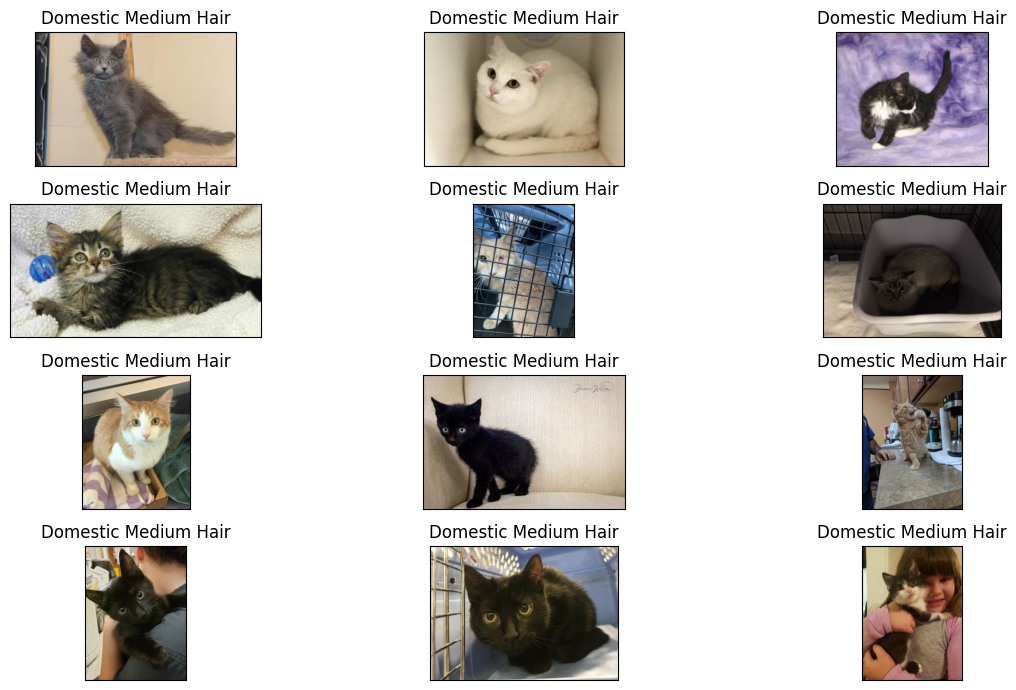

In [6]:
f,a = plt.subplots(nrows=4, ncols=3,figsize=(13, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(a.flat):
    ax.imshow(plt.imread(df.filepath[i]))
    ax.set_title(df.label[i])
    
plt.tight_layout()
plt.show()

In [9]:
# Data Imbalance!
pd.DataFrame(df["label"].value_counts()).reset_index()

,label,count
0,Domestic Short Hair,53027
1,Domestic Medium Hair,5482
2,American Shorthair,5295
3,Domestic Long Hair,4499
4,Persian,4018
...,...,...
61,LaPerm,17
62,Burmilla,8
63,Canadian Hairless,4
64,Chinchilla,3
